<h1 style="text-align:center;vertical-align:middle">数据挖掘第四周作业</h1>
<h1 style="text-align:center;vertical-align:middle">选用数据集GitHub Dataset</h1>
<h3 style="text-align:center;vertical-align:middle">3220221159  罗泽宇</h3>

github地址：https://github.com/LGAG/DataMining

## 数据概览



In [1]:
import pandas as pd
import numpy as np
import github_dataset

In [2]:
github_dataset.show_col()

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

每行数据包括7个列，分别代表：

- **repositories** 数据仓库。
- **stars_count** 星星数量
- **forks_count** fork的数量
- **issues_count** 事件的计数
- **pull_requests** 提交请求的数量
- **contributors** 贡献者数量
- **language** 使用的语言

接下来的内容将对以上属性中的数值属性，有意义的非唯一标称属性，以及可推导获得的有意义的属性进行数据分析与预处理。

### 1 repositories (无缺失值)

In [3]:
helper = github_dataset.col_helper()

In [4]:
helper.select_col('repositories')
# 缺失值个数
n_b = helper.count_none()

0


没有缺失值

### 2 stars_count (无缺失值)


In [5]:
helper.select_col('stars_count')

In [6]:
helper.count_none('')

0


0

没有缺失值

**数据摘要**

In [7]:
# 五数概括
helper.five_number()

Min: 0
Q1: 1.0
Q2: 12.0
Q3: 65.25
Max: 995


**数据分布**

[  0 271   0 ...   0  11   4]


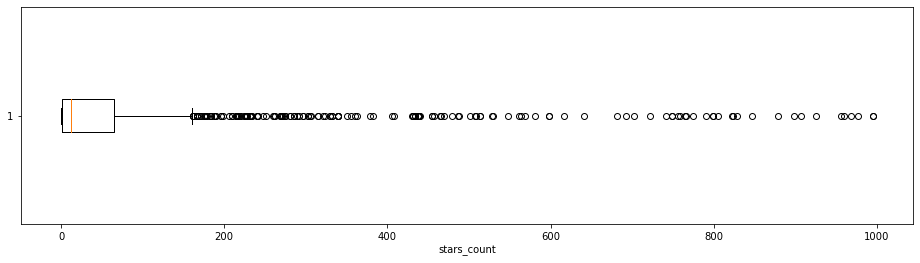

161.625


In [8]:
# 盒图
helper.box(16,4,'stars_count')

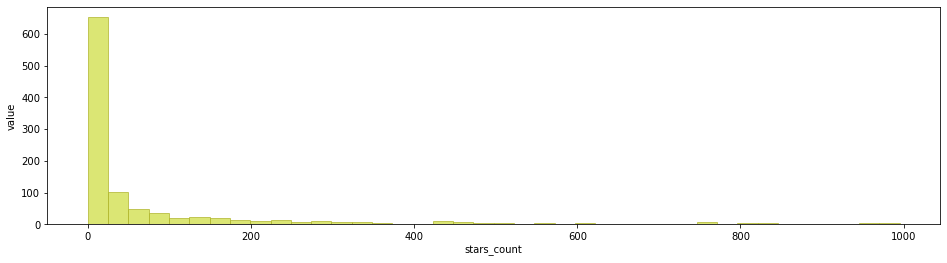

In [9]:
# 直方图
helper.normal_hist(16,4,'stars_count','value')

从盒图和直方图可以看出，大多数的仓库都没有星星数量

### 3 forks_count (无缺失值)



In [10]:
helper.select_col('forks_count')

In [11]:
helper.count_none('')

0


0

没有缺失值

**数据摘要**

In [12]:
# 五数概括
helper.five_number()

Min: 0
Q1: 1.0
Q2: 6.0
Q3: 38.25
Max: 973


**数据分布**

[  0 150   0 ...   5   5   3]


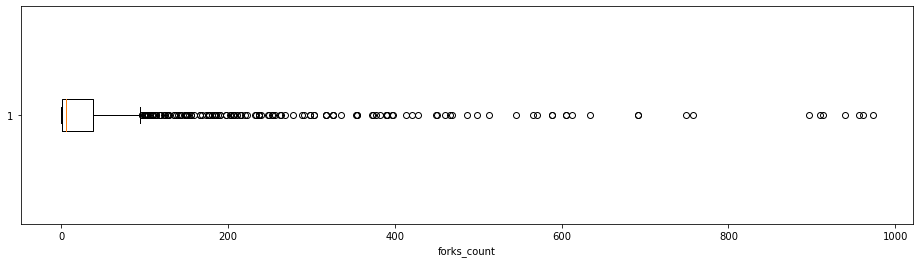

94.125


In [13]:
# 盒图
helper.box(16,4,'forks_count')

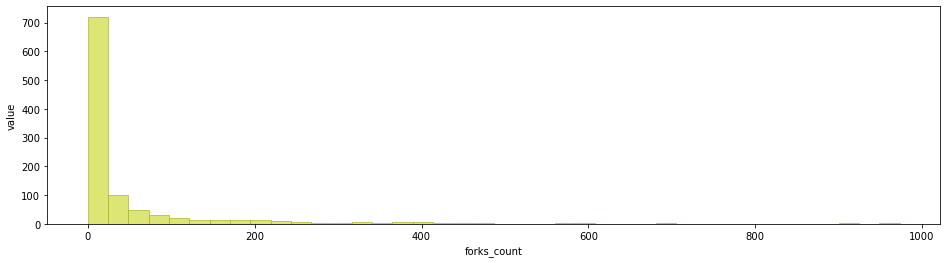

In [14]:
# 直方图
helper.normal_hist(16,4,'forks_count','value')

从盒图和直方图可以看出，大多数的仓库都没有fork数量

### 4 issues_count(无缺失值)

In [15]:
helper.select_col('issues_count')

In [16]:
helper.count_none() #无缺失值

0


0

没有缺失值

**数据摘要**

In [17]:
# 五数概括
helper.five_number()

Min: 1
Q1: 1.0
Q2: 2.0
Q3: 6.0
Max: 612


**数据分布**

[612 536 313 ...   1   1   1]


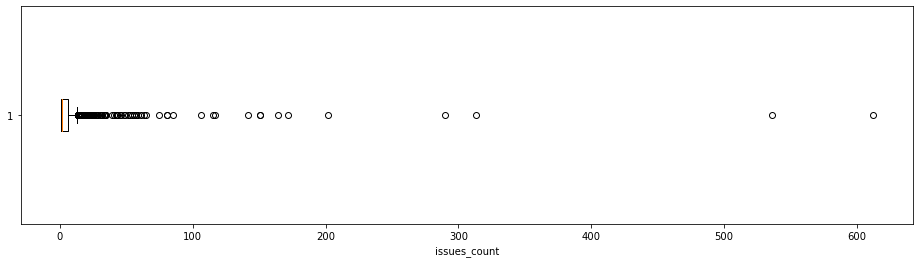

13.5


In [18]:
# 盒图
helper.box(16,4,'issues_count')

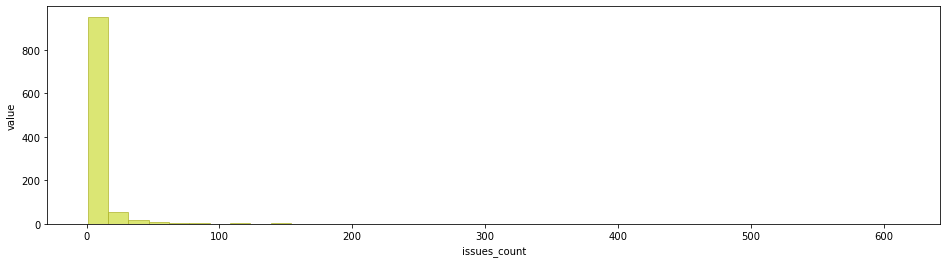

In [19]:
# 直方图
helper.normal_hist(16,4,'issues_count','value')

从盒图和直方图可以看出，大多数的仓库的issue数量均为1.

### 5 pull_requests(无缺失值)


In [20]:
helper.select_col('pull_requests')

In [21]:
helper.count_none()

0


0

无缺失值
  

**数据摘要**
  

In [22]:
# 五数概括
helper.five_number()

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 2.0
Max: 567


**数据分布**
  

[316   6  27 ...   1   0   0]


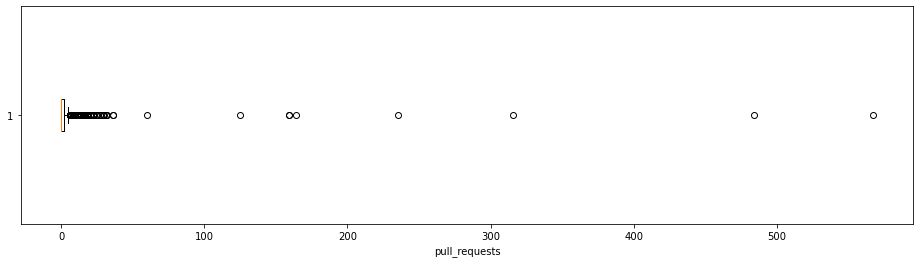

5.0


In [23]:
# 盒图
helper.box(16,4,'pull_requests')

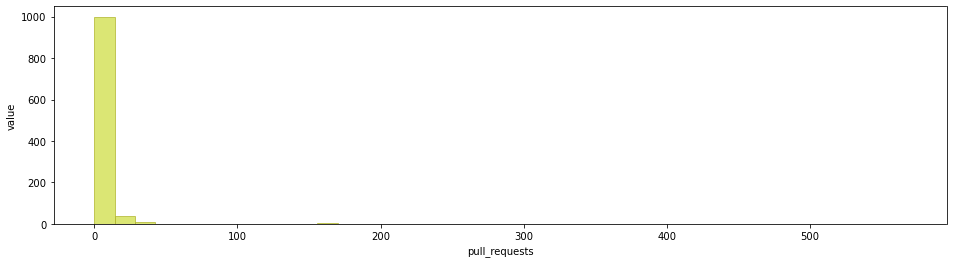

In [24]:
# 直方图
helper.normal_hist(16,4,'pull_requests','value')

从盒图和直方图可以看出，几乎所有的仓库的pull_requests数量均小于100.

### 6 contributors(无缺失值)


In [25]:
helper.select_col('contributors')

In [26]:
helper.count_none()

0


0

无缺失值
  

**数据摘要**
  

In [27]:
# 五数概括
helper.five_number()

Min: 0
Q1: 0.0
Q2: 2.0
Q3: 4.0
Max: 658


**数据分布**
  

[  2  71 154 ...   7   0   0]


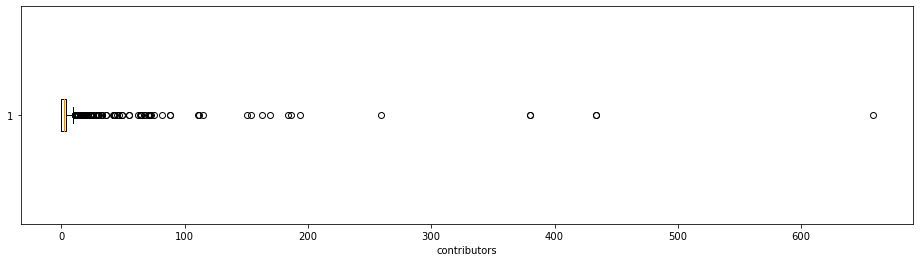

10.0


In [28]:
# 盒图
helper.box(16,4,'contributors')

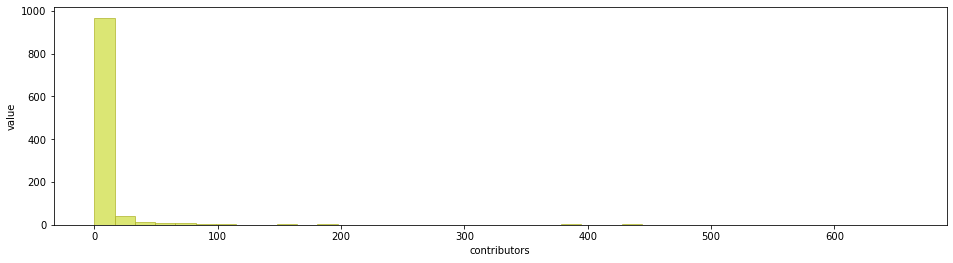

In [29]:
# 直方图
helper.normal_hist(16,4,'contributors','value')

从盒图和直方图可以看出，几乎所有的仓库的contributors数量均小于100.

### 7 使用的语言(有缺失值)


In [30]:
helper.select_col('language')

In [31]:
helper.count_none()

145


145

**有145个仓库对应的语言是NULL**
  

**数据分布**
  

In [32]:
helper.data['language'].value_counts()

JavaScript          253
Python              155
NULL                145
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Swift                10
Rust                 10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
AutoHotkey            3
Dockerfile            3
CoffeeScript          3
Perl                  3
Solidity              3
Vim Script            2
Pawn                  2
Assembly              2
PowerShell            2
Hack                  2
CodeQL                2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML             

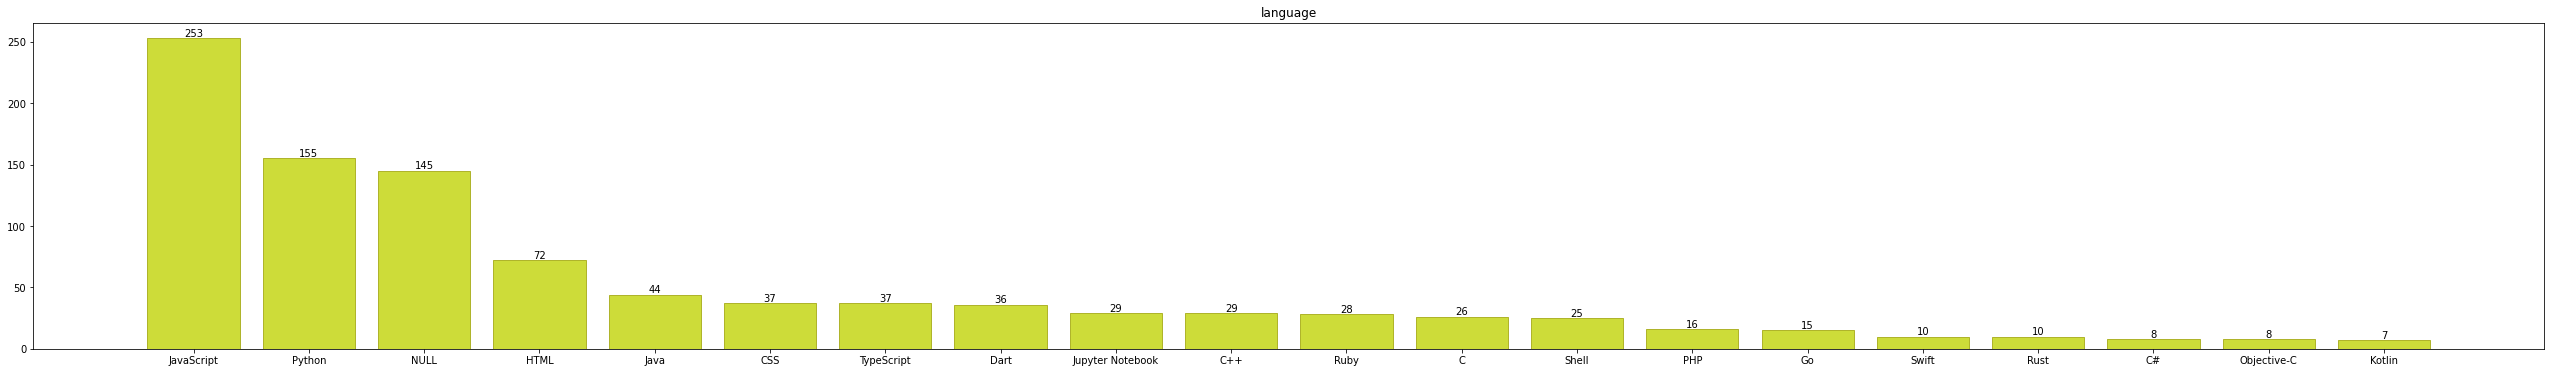

In [33]:
helper.hist_bar(45,6,20)

部分仓库的语言数据存在缺失值，推测原因是在数据记录时出错，因为一个代码仓库不能没有使用的语言，因此可以推测是数据收集以及整理过程中就已经出现了问题。这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据： 因为缺失值个数和不是很多，直接删除应该影响并不能对后续的数据分析造成不可逆的影响。

将缺失数据用频率最高的值代替：  JavaScript，可用该语言进行填充。

利用数据对象的相关性进行填补

利用属性的相关性进行填补

此处由于仓库的各种数据指标无法与所使用的的语言进行关联，所以这里使用直接删除的方式。

In [34]:
index11,row11 = github_dataset.get_row_index('language','NULL')
print(row11)

[array(['octocat/Hello-World', 0, 0, 612, 316, 2, 'NULL'], dtype=object), array(['EddieHubCommunity/support', 271, 150, 536, 6, 71, 'NULL'],
      dtype=object), array(['taniarascia/comments', 4, 0, 117, 0, 0, 'NULL'], dtype=object), array(['florinpop17/app-ideas', 0, 0, 46, 235, 68, 'NULL'], dtype=object), array(['education/teachers', 176, 28, 39, 0, 2, 'NULL'], dtype=object), array(['octocat/hello-worId', 176, 114, 35, 9, 0, 'NULL'], dtype=object), array(['anuraghazra/anuraghazra', 228, 0, 33, 4, 3, 'NULL'], dtype=object), array(['WhiteHouse/api-standards', 0, 910, 27, 7, 12, 'NULL'],
      dtype=object), array(['offensive-security/kali-nethunter', 0, 897, 26, 3, 33, 'NULL'],
      dtype=object), array(['octocat/git-consortium', 135, 67, 25, 10, 0, 'NULL'], dtype=object), array(['benawad/astral-bugs', 42, 1, 18, 0, 0, 'NULL'], dtype=object), array(['openfoodfacts/offf', 0, 0, 16, 0, 0, 'NULL'], dtype=object), array(['offensive-security/nethunter-app', 281, 159, 16, 2, 22, 'NULL'],
  

In [35]:
github_dataset.delete_row(index11)

In [36]:
# 删除后缺失值个数
helper.count_none_after()

0


0

In [37]:
helper.data2['language'].value_counts()

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    

<h1 style="text-align:center;vertical-align:middle">数据挖掘第四周作业</h1>
<h1 style="text-align:center;vertical-align:middle">选用数据集Movies Dataset from Pirated Sites</h1>
<h3 style="text-align:center;vertical-align:middle">3220221159  罗泽宇</h3>

github地址：https://github.com/LGAG/DataMining

## 数据概览


In [1]:
import pandas as pd
import numpy as np
import movies_dataset

In [2]:
movies_dataset.show_col()

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

每行数据包括15个列，分别代表：

- **Unnamed: 0** 序号
- **IMDb-rating** 电影评分
- **appropriate_for** 电影分级
- **director** 导演
- **downloads** 电影下载次数
- **id** 电影的id
- **industry** 电影的出品公司
- **language** 电影使用的语言
- **posted_date** 电影的发布日期
- **release_date** 首次上映日期
- **run_time** 电影时长
- **storyline** 电影的主要故事
- **title** 电影标题
- **views** 观看次数
- **writer** 编剧


接下来的内容将对以上属性中的数值属性，有意义的非唯一标称属性，以及可推导获得的有意义的属性进行数据分析与预处理。

In [3]:
helper = movies_dataset.col_helper(1)

### 1 序号 (无缺失值)

In [4]:
helper.select_col('Unnamed: 0')
# 缺失值个数
n_b = helper.count_none()

0


没有缺失值

### 2 IMDb-rating (有缺失值)


In [5]:
helper.select_col('IMDb-rating')

In [6]:
helper.count_none('')

841


841

有841个缺失值，这里猜测，由于盗版电影网站不一定会那么全面的数据，因此猜测是数据不全造成的

这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据

将缺失数据用中位数或平均数值代替

利用数据对象的相关性进行填补

利用属性的相关性进行填补

**数据摘要**

In [7]:
helper.data2['IMDb-rating'].value_counts()

       841
6.6    829
5      774
5.7    747
6.1    724
      ... 
1.5      2
9.1      1
9.9      1
9.5      1
1.3      1
Name: IMDb-rating, Length: 86, dtype: int64

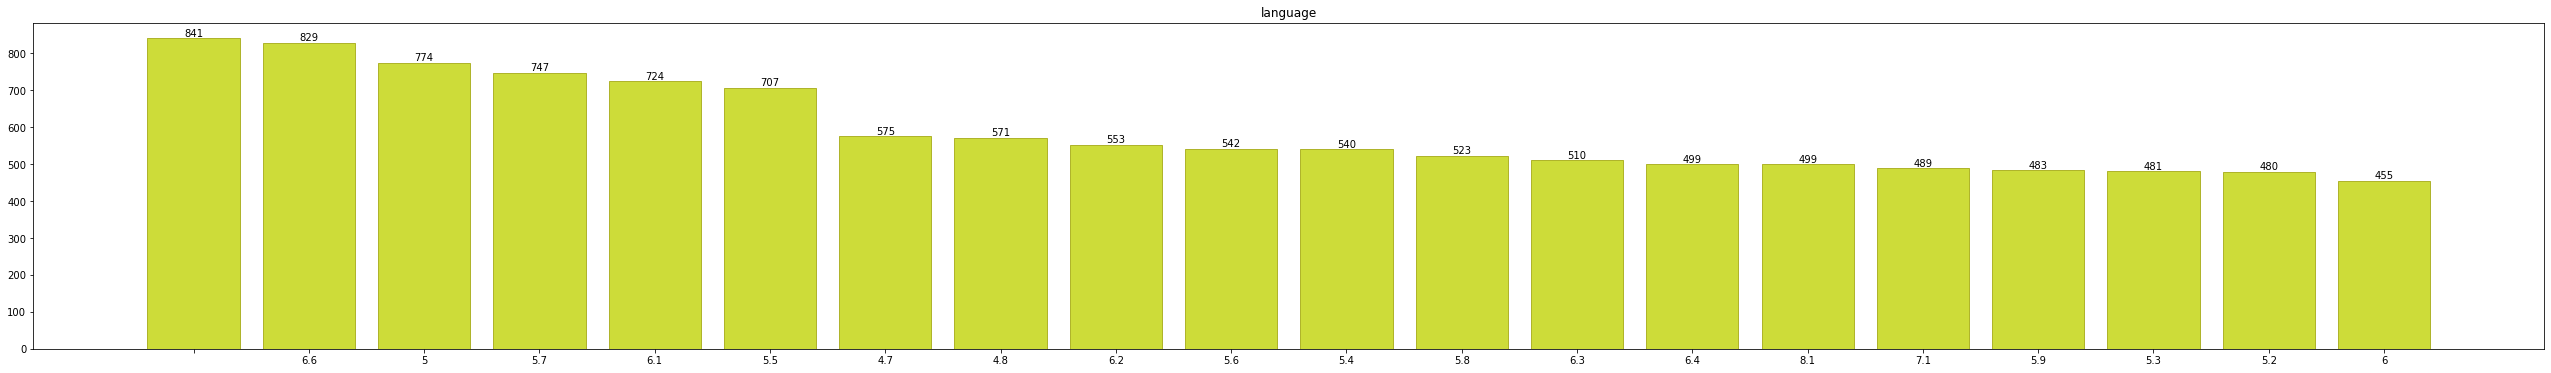

In [8]:
helper.hist_bar(45,6,20)

In [9]:
index11,row11 = movies_dataset.get_row_index('IMDb-rating','')
print(row11)

[array([6, '', 'TV-PG', '', '5332.00 ', 372059, 'Wrestling', 'English',
       '19 Feb, 2023', 'Feb 18 2023', '200',
       'Undisputed\r\n WWE Universal title: Reigns vs Sami Zayn. Lashley vs Lesnar. Edge, \r\nPhoenix vs Balor, Ripley. US title: Theory vs Rollins vs Gargano vs Reed\r\n vs Priest vs Montez. Asuka vs Morgan vs Cross vs Natalya vs Rodriguez \r\nvs Carmella.',
       'WWE Elimination Chamber', '11978.00 ', ''], dtype=object), array([12, '', '', '', '2253.00 ', 372038, 'Wrestling', 'English',
       '18 Feb, 2023', 'Feb 17 2023', '', '', 'WWE Smackdown 2023-02-17',
       '5468.00 ', ''], dtype=object), array([16, '', '', '', '2785.00 ', 371990, 'Punjabi', 'Punjabi',
       '17 Feb, 2023', 'Feb 16 2023', '', '', 'Sab Fadey Jaange.2023',
       '12968.00 ', ''], dtype=object), array([18, '', '', '', '171.00 ', 371988, 'Wrestling', 'English',
       '17 Feb, 2023', 'Feb 16 2023', '', '', 'TNA.Impact 2023-02-16',
       '667.00 ', ''], dtype=object), array([24, '', '', 'Sumee

In [10]:
movies_dataset.delete_row(index11,2)

In [11]:
# 删除后缺失值个数
helper.count_none_after()

0


0

**数据分布**

In [12]:
helper2 = movies_dataset.col_helper(2)

In [13]:
helper2.select_col('IMDb-rating')

In [14]:
# 五数概括
helper2.five_number()

Min: 1.1
Q1: 4.8
Q2: 5.7
Q3: 6.6
Max: 9.9


[4.8 6.4 5.2 ... 7.2 7.7 8. ]


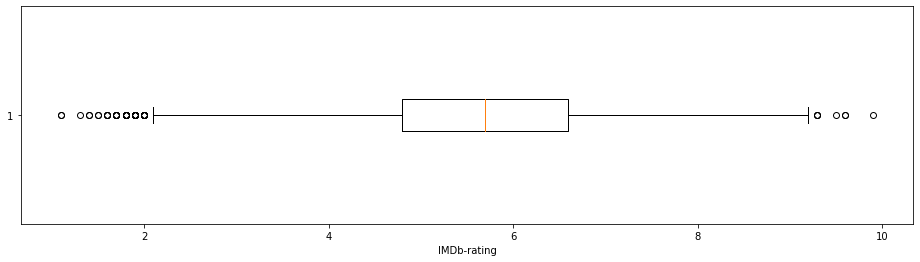

9.299999999999999


In [15]:
# 盒图
helper2.box(16,4,'IMDb-rating')

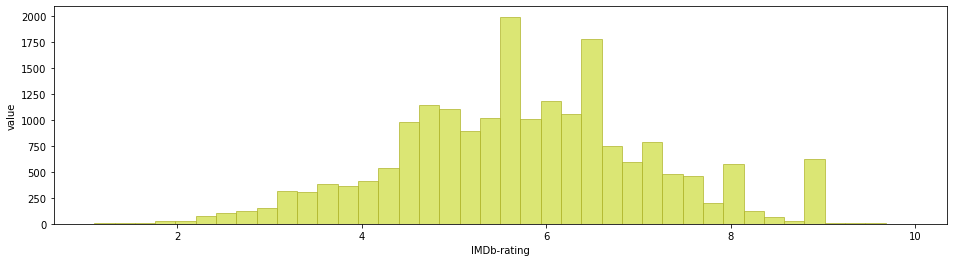

In [16]:
# 直方图
helper2.normal_hist(16,4,'IMDb-rating','value')

从盒图和直方图可以看出，大多数的电影评分接近正态分布，符合一般性规律

### 3 appropriate_for (有缺失值)



In [17]:
helper.select_col('appropriate_for')

In [18]:
helper.count_none('')

9476


9476

有9476个缺失值，这里猜测，由于盗版电影网站不一定会那么全面的数据，因此猜测是数据不全造成的

这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据

将缺失数据用中位数或平均数值代替

利用数据对象的相关性进行填补

利用属性的相关性进行填补

In [19]:
helper.data2['appropriate_for'].value_counts()

                  9476
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

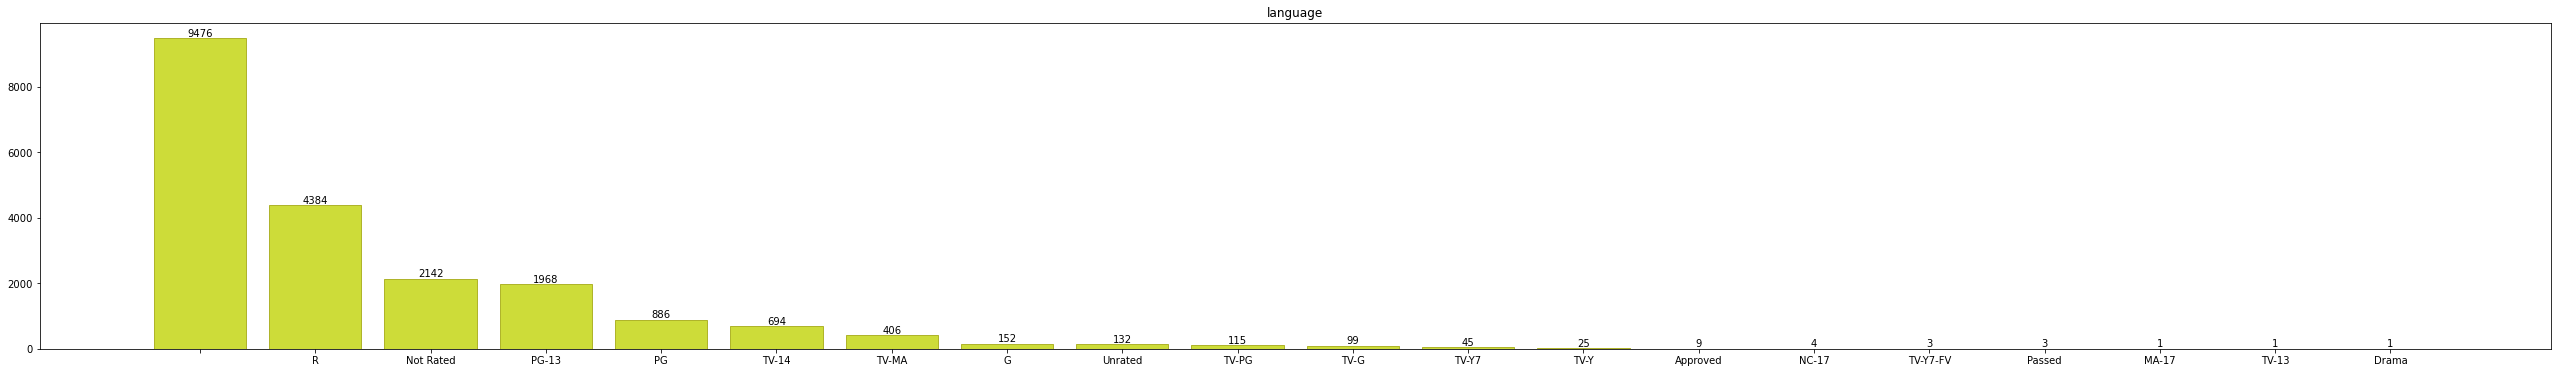

In [20]:
helper.hist_bar(45,6,20)

In [21]:
index11,row11 = movies_dataset.get_row_index('appropriate_for','')
print(index11)

[3, 4, 5, 9, 10, 11, 12, 16, 18, 19, 20, 22, 23, 24, 27, 30, 35, 37, 38, 39, 41, 43, 44, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 73, 75, 76, 77, 81, 82, 83, 85, 87, 92, 93, 94, 97, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 114, 115, 116, 120, 121, 122, 125, 126, 127, 129, 131, 133, 134, 136, 137, 138, 139, 140, 142, 146, 147, 148, 149, 150, 152, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 169, 170, 171, 173, 175, 178, 180, 181, 182, 183, 184, 185, 186, 188, 191, 193, 195, 196, 200, 201, 203, 204, 205, 207, 208, 209, 210, 211, 213, 214, 215, 217, 219, 220, 225, 226, 228, 229, 230, 232, 233, 234, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 251, 254, 255, 257, 258, 259, 261, 263, 265, 266, 267, 268, 272, 273, 274, 277, 278, 279, 280, 282, 287, 288, 289, 290, 291, 292, 293, 297, 301, 302, 303, 305, 307, 310, 311, 313, 314, 315, 316, 317, 318, 319, 321, 322, 323, 325, 326, 327, 328, 329, 332, 334, 335, 337, 338, 339, 34

In [22]:
movies_dataset.delete_row(index11,3)

In [23]:
# 删除后缺失值个数
helper.count_none_after()

0


0

### 4 其余非数值属性
director 导演

id 电影编号
 
industry 电影的出品公司

language 电影使用的语言

posted_date 电影的发布日期

release_date 首次上映日期

storyline 电影的主要故事

title 电影标题

writer 编剧

处理逻辑同电影分级。



In [24]:
helper.select_col('director')

In [25]:
helper.data2['director'].value_counts()

                   1938
Venky Atluri        405
Simone Stock        403
Xavier Manrique     403
John Swab           205
                   ... 
David G. Evans        1
Theresa Rebeck        1
Mark Grentell         1
Nick Searcy           1
Becca Gleason         1
Name: director, Length: 9673, dtype: int64

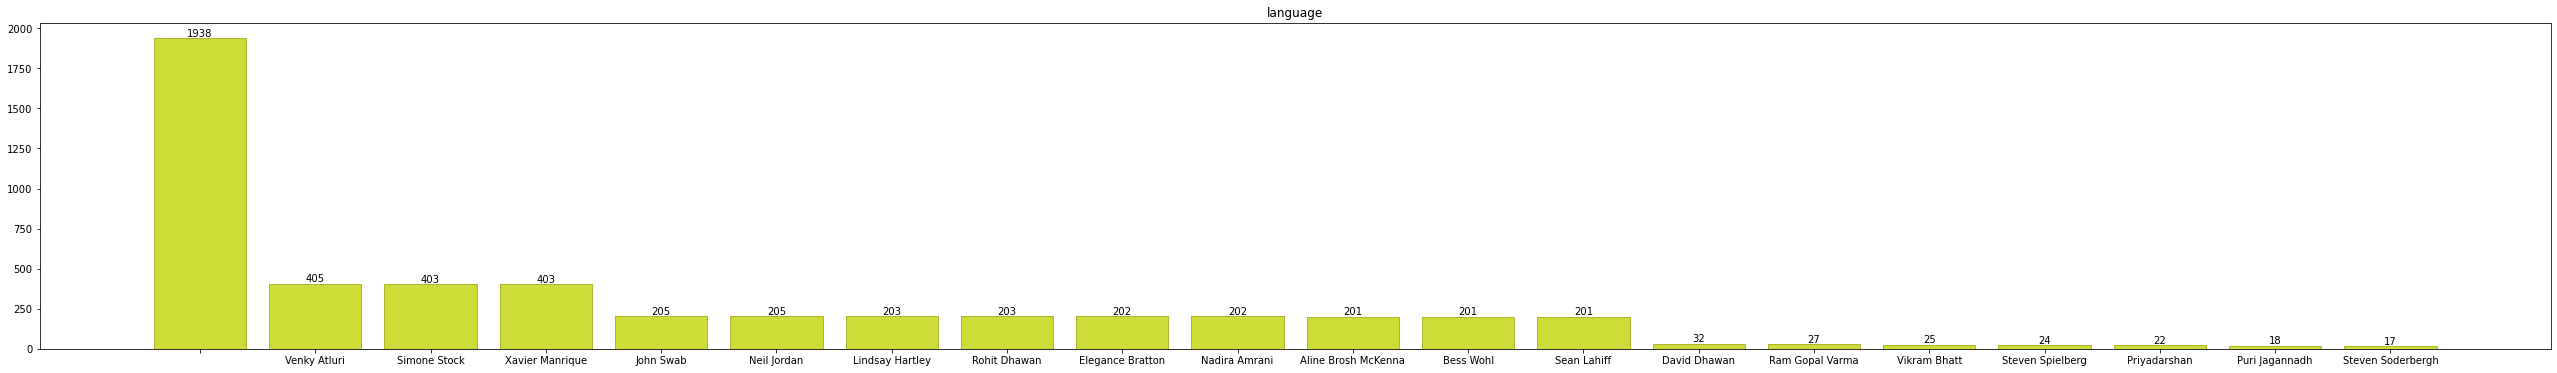

In [26]:
helper.hist_bar(45,6,20)

In [27]:
helper.select_col('industry')
helper.data2['industry'].value_counts()


Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
                           1
3D Movies                  1
Name: industry, dtype: int64

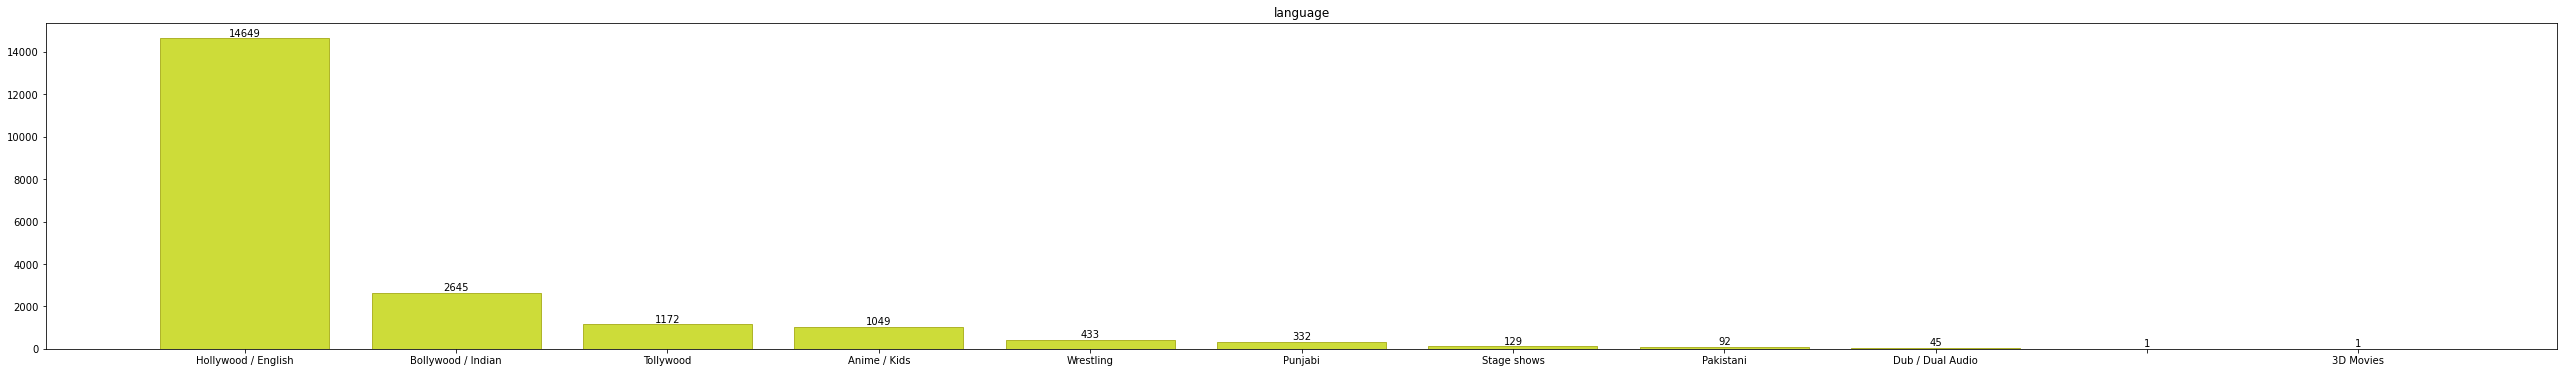

In [28]:
helper.hist_bar(45,6,20)

In [29]:
helper.select_col('language')
helper.data2['language'].value_counts()


English                                          12657
Hindi                                             2558
                                                   542
English,Spanish                                    391
Punjabi                                            310
                                                 ...  
English,Mandarin,Turkish,Indonesian,Russian          1
English,Polynesian,Spanish                           1
English,Cheyenne,French                              1
English,American Sign Language,Russian,French        1
Spanish,German,English                               1
Name: language, Length: 1169, dtype: int64

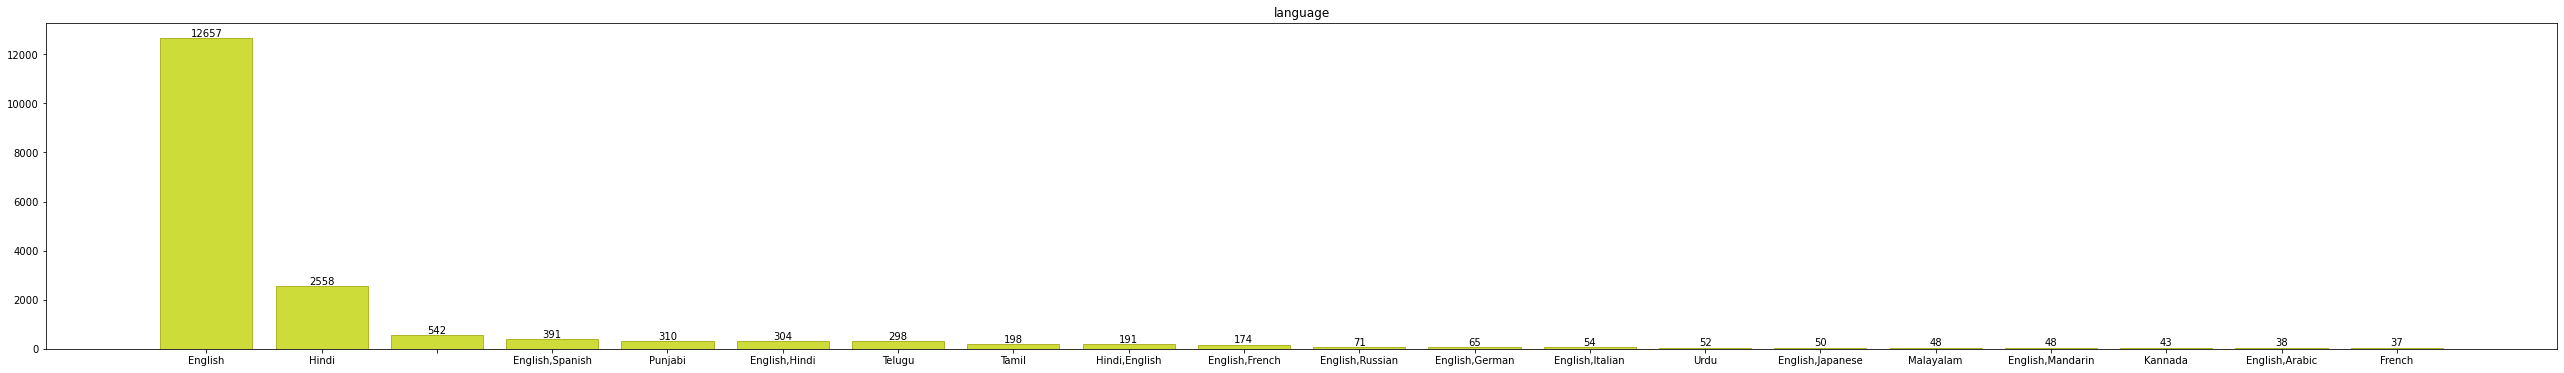

In [30]:
helper.hist_bar(45,6,20)

In [31]:
helper.select_col('writer')
helper.data2['writer'].value_counts()


                                          2192
Nicholas Schutt                            403
Venky Atluri                               402
Haley Harris                               402
John Swab                                  205
                                          ... 
Barbara Samuels, Joseph Boyden               1
Maria Allred                                 1
Pia Mechler                                  1
Paul Flannery, David Ryan Keith              1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas       1
Name: writer, Length: 13604, dtype: int64

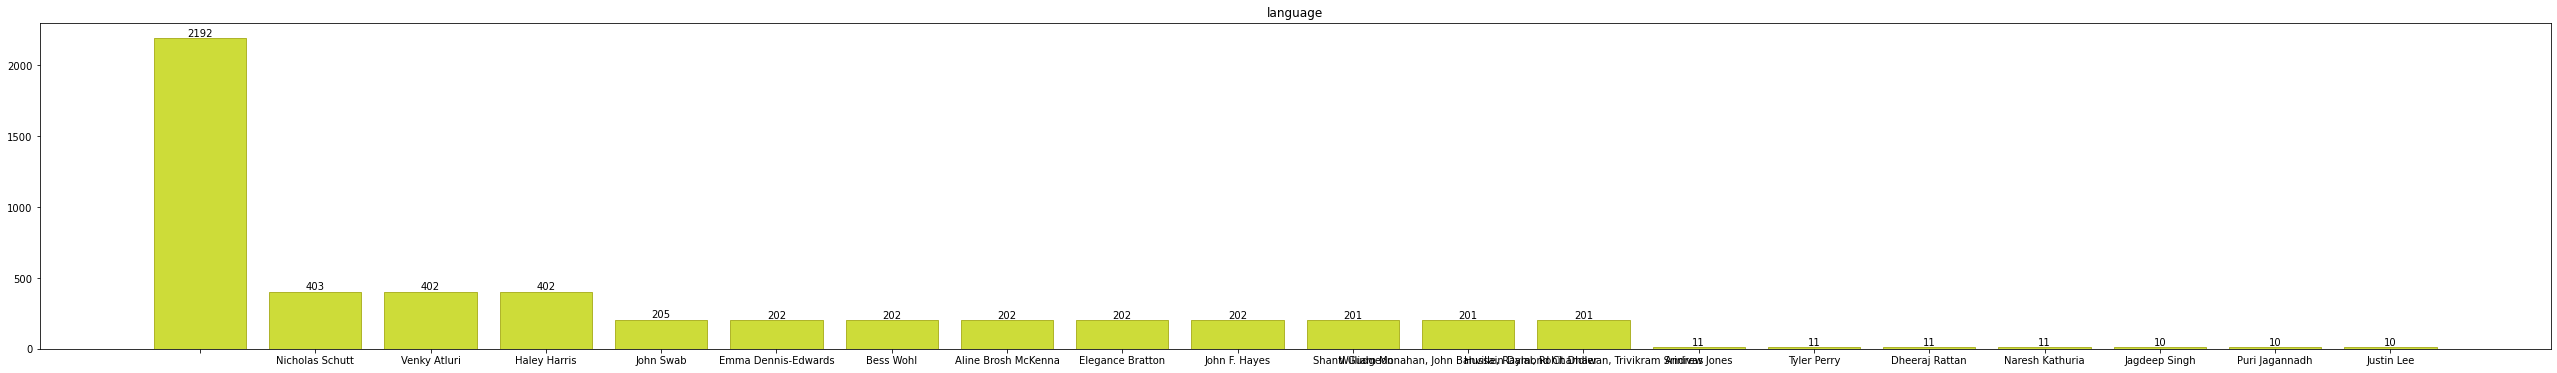

In [32]:
helper.hist_bar(45,6,20)

### 5 downloads 电影下载次数




In [33]:
helper.select_col('downloads')

In [34]:
helper.count_none('')

1


1

有1个缺失值

In [35]:
helper.data2['downloads'].value_counts()

75.00        403
622.00       212
378.00       209
1782.00      187
466.00       170
            ... 
3721.00        1
13947.00       1
51963.00       1
19225.00       1
3276.00        1
Name: downloads, Length: 10626, dtype: int64

In [36]:
index11,row11 = movies_dataset.get_row_index('downloads','')
print(index11)
movies_dataset.delete_row(index11,4)

[149]


In [37]:
helper4 = movies_dataset.col_helper(4)
helper4.select_col('downloads')

In [38]:
# 五数概括
helper4.five_number()

Min: 0.0
Q1: 855.5
Q2: 2716.0
Q3: 10070.0
Max: 391272.0


[ 304.   73. 1427. ... 3276.  309. 2613.]


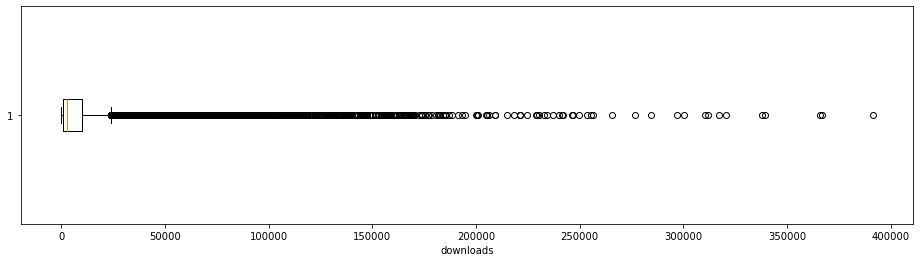

23891.75


In [39]:
# 盒图
helper4.box2(16,4,'downloads')

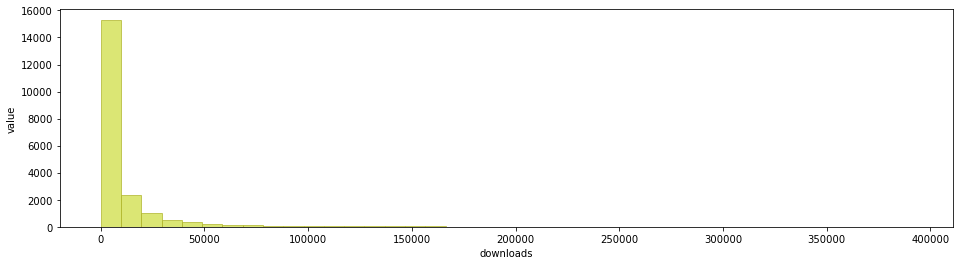

In [40]:
# 直方图
helper4.normal_hist(16,4,'downloads','value')

从盒图和直方图可以看出，大多数的电影观看下载数适中，符合“盗版网站”的特点。

### 6 run_time 电影时长

In [41]:
helper.select_col('run_time')

In [42]:
helper.count_none('')

1768


1768

有1768个缺失值，这里猜测，由于盗版电影网站不一定会那么全面的数据，因此猜测是数据不全造成的

这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据

将缺失数据用中位数或平均数值代替

利用数据对象的相关性进行填补

利用属性的相关性进行填补

In [43]:
helper.data2['run_time'].value_counts()

            1768
93           652
88           622
101          568
139          454
            ... 
74 min         1
288            1
220            1
49min          1
3h 13min       1
Name: run_time, Length: 416, dtype: int64

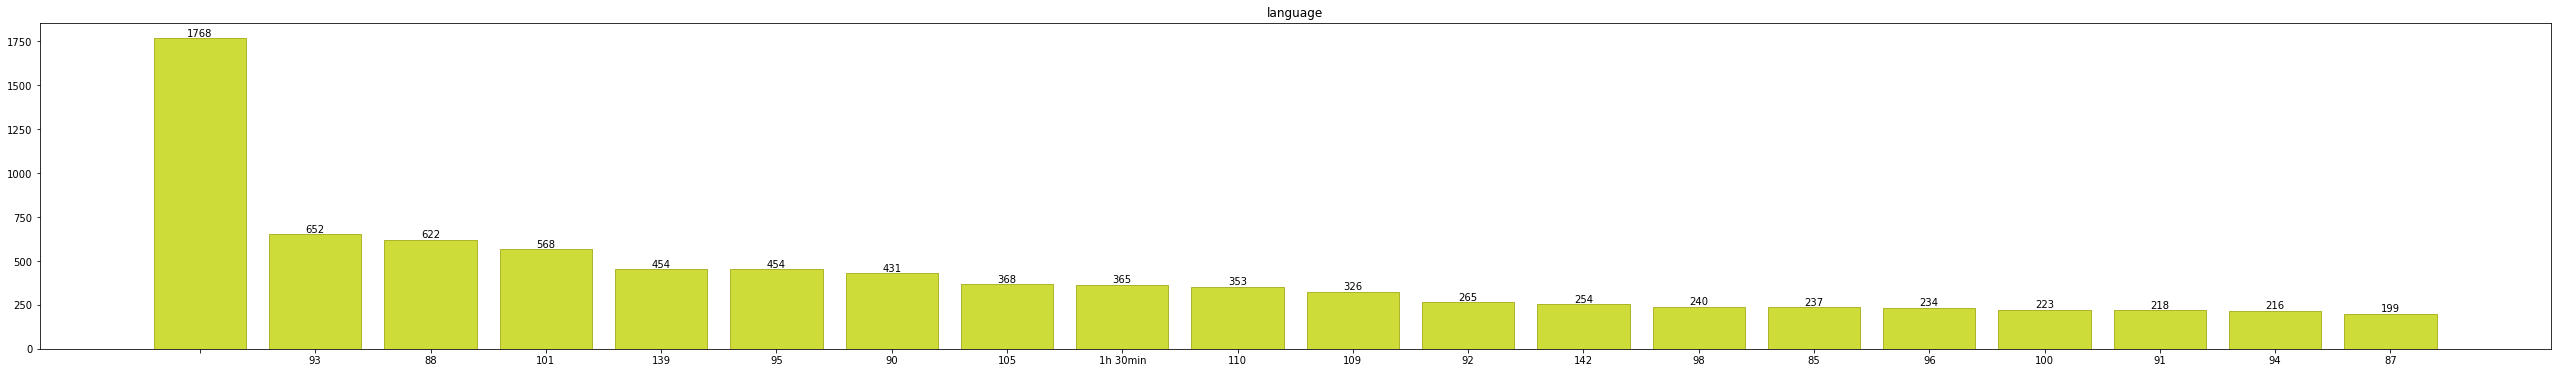

In [44]:
helper.hist_bar(45,6,20)

In [45]:
index11,row11 = movies_dataset.get_row_index('run_time','')
print(index11)

[10, 12, 16, 18, 22, 23, 32, 35, 44, 55, 60, 63, 66, 77, 91, 92, 99, 100, 105, 111, 112, 123, 142, 149, 150, 151, 156, 182, 183, 186, 193, 196, 205, 224, 230, 243, 248, 266, 267, 279, 280, 282, 291, 297, 310, 311, 319, 322, 329, 339, 340, 352, 356, 367, 368, 371, 374, 375, 376, 381, 396, 399, 400, 403, 413, 418, 424, 443, 453, 457, 462, 465, 472, 490, 507, 510, 514, 518, 529, 530, 536, 539, 540, 541, 543, 544, 545, 546, 550, 552, 553, 554, 563, 579, 600, 616, 621, 629, 642, 647, 665, 674, 675, 677, 683, 694, 717, 726, 738, 762, 772, 782, 798, 815, 823, 825, 837, 853, 855, 856, 867, 884, 907, 933, 935, 938, 972, 977, 981, 1027, 1030, 1076, 1128, 1193, 1256, 1264, 1290, 1291, 1349, 1390, 1414, 1426, 1506, 1508, 1515, 1523, 1571, 1632, 1636, 1748, 1762, 1770, 1859, 1868, 1903, 1925, 1952, 1993, 1997, 2031, 2043, 2046, 2083, 2089, 2102, 2127, 2180, 2288, 2299, 2308, 2323, 2336, 2402, 2410, 2477, 2479, 2564, 2603, 2828, 2831, 2838, 2840, 2849, 2850, 2851, 2860, 2861, 2869, 2870, 2881, 2885,

In [46]:
movies_dataset.delete_row(index11,5)

In [47]:
helper5 = movies_dataset.col_helper(5)
helper5.select_col('run_time')

### 7 views 观看次数

In [48]:
helper.select_col('views')

In [49]:
helper.count_none('')

1


1

有1个缺失值，这里猜测，由于盗版电影网站不一定会那么全面的数据，因此猜测是数据不全造成的

这里可以进行缺失值的处理方式有以下几种：

删除所有缺失数据

将缺失数据用中位数或平均数值代替

利用数据对象的相关性进行填补

利用属性的相关性进行填补

In [50]:
helper.data2['views'].value_counts()

6259.00       6
5859.00       5
5926.00       5
6643.00       5
14859.00      5
             ..
142470.00     1
104507.00     1
152768.00     1
6460.00       1
1419.00       1
Name: views, Length: 16822, dtype: int64

In [51]:
index11,row11 = movies_dataset.get_row_index('views','')
print(index11)
movies_dataset.delete_row(index11,6)

[149]


In [52]:
helper6 = movies_dataset.col_helper(6)
helper6.select_col('views')

In [53]:
# 五数概括
helper6.five_number()

Min: 667.0
Q1: 7571.5
Q2: 15222.0
Q3: 36571.0
Max: 1638533.0


[ 2794.  1002. 14419. ...  7220.  1419.  6697.]


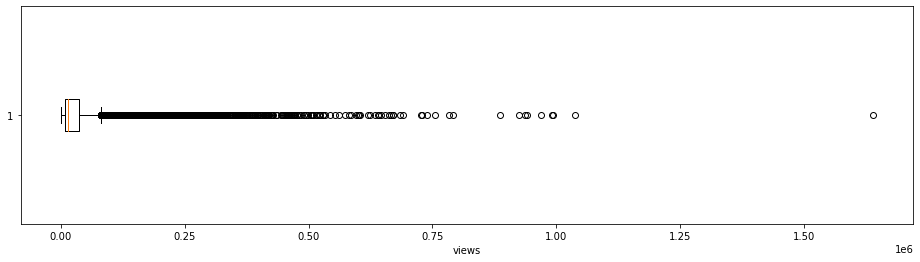

80070.25


In [54]:
# 盒图
helper6.box(16,4,'views')

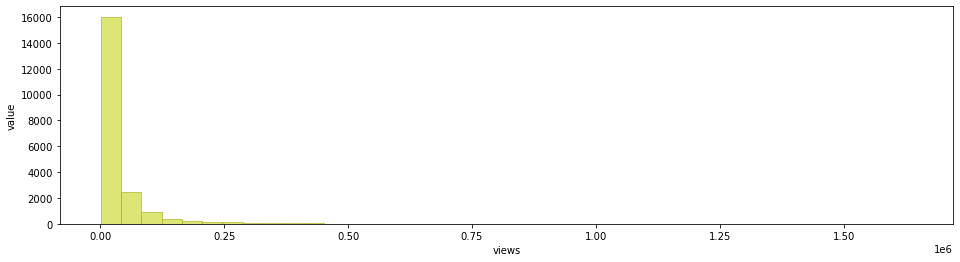

In [55]:
# 直方图
helper6.normal_hist(16,4,'views','value')

从盒图和直方图可以看出，大多数的电影观看观看数适中，符合“盗版网站”的特点。

-- END --